# Rocks vs Mines

### Importing necessary stuff

In [1]:
import numpy as np
import matplotlib.pyplot as plot
from urllib.request import urlopen
from scipy import stats
import pandas as pd

### Get data

In [2]:
target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data")
rockMine = pd.read_csv(target_url, header = None, prefix = "V")

### First look at the data

In [3]:
summary = rockMine.describe()
print(rockMine.head())
print(summary)

       V0      V1      V2      V3      V4      V5      V6      V7      V8  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       V9 ...      V51     V52     V53     V54     V55     V56     V57  \
0  0.2111 ...   0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872 ...   0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194 ...   0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264 ...   0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459 ...   0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

      V58     V59  V60  
0  0.0090  0.0032    R  
1  0.0052  0.0044    R  
2  0.0095  0.0078

### Quartiles boxplot

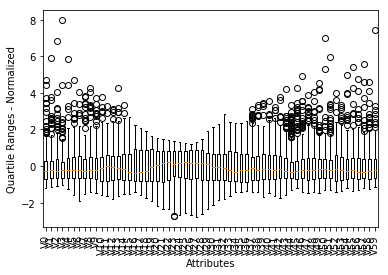

In [4]:
rockMineNormalized = rockMine.copy()
ncols = len(rockMineNormalized.columns)

for i in range(ncols - 1): 
    mean = summary.iloc[1, i]
    sd = summary.iloc[2, i]
    
    rockMineNormalized.iloc[:, i:(i + 1)] = (rockMineNormalized.iloc[:, i:(i + 1)] - mean) /sd #leaving out the categorial target column
    
array = rockMineNormalized.values[:, 0:-1] #leaving out the categorial target column
plot.boxplot(array)
plot.xticks(list(range(1, len(summary.columns) + 1)), list(summary.columns), rotation = 'vertical')
plot.xlabel("Attributes")
plot.ylabel("Quartile Ranges - Normalized")
plot.show()

### Propability plots

Column 0:


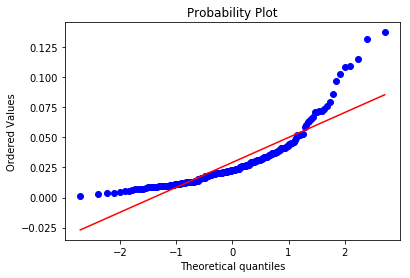

Column 1:


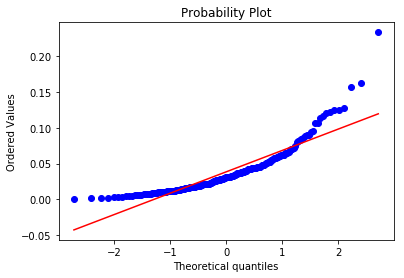

Column 2:


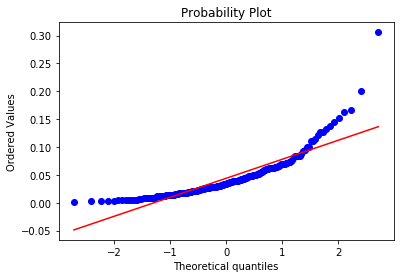

Column 3:


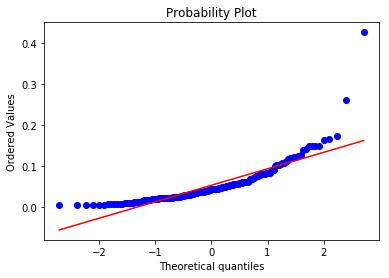

Column 4:


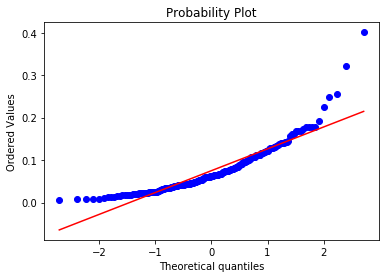

Column 5:


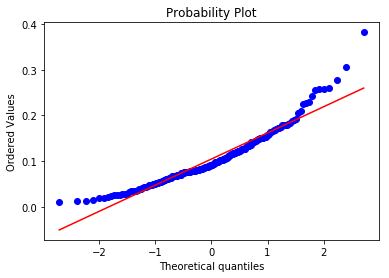

Column 6:


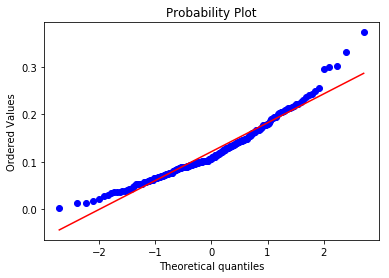

Column 7:


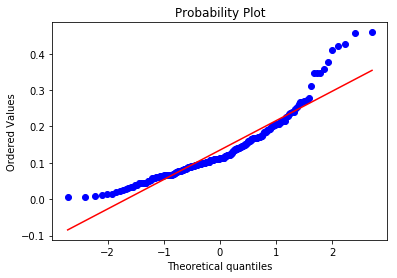

In [5]:
for col in range(len(summary)):
    stats.probplot(rockMine.iloc[:,col], dist = "norm", plot = plot)
    print("Column " + str(col) + ":")
    plot.show()


### Correlation heat map

In [6]:
corMat = pd.DataFrame(rockMine.corr())
print(corMat)

           V0        V1        V2        V3        V4        V5        V6  \
V0   1.000000  0.735896  0.571537  0.491438  0.344797  0.238921  0.260815   
V1   0.735896  1.000000  0.779916  0.606684  0.419669  0.332329  0.279040   
V2   0.571537  0.779916  1.000000  0.781786  0.546141  0.346275  0.190434   
V3   0.491438  0.606684  0.781786  1.000000  0.726943  0.352805  0.246440   
V4   0.344797  0.419669  0.546141  0.726943  1.000000  0.597053  0.335422   
V5   0.238921  0.332329  0.346275  0.352805  0.597053  1.000000  0.702889   
V6   0.260815  0.279040  0.190434  0.246440  0.335422  0.702889  1.000000   
V7   0.355523  0.334615  0.237884  0.246742  0.204006  0.471683  0.675774   
V8   0.353420  0.316733  0.252691  0.247078  0.177906  0.327578  0.470580   
V9   0.318276  0.270782  0.219637  0.237769  0.183219  0.288621  0.425448   
V10  0.344058  0.297065  0.274610  0.271881  0.231684  0.333570  0.396588   
V11  0.210861  0.194102  0.214807  0.175381  0.211657  0.344451  0.274432   

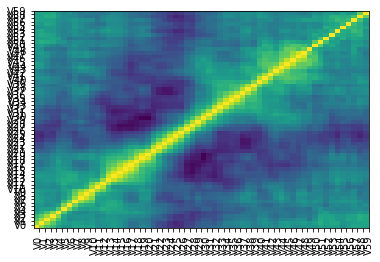

In [7]:
plot.pcolor(corMat)
plot.xticks(list(range(1, len(summary.columns) + 1)), list(summary.columns), rotation = 'vertical')
plot.yticks(list(range(1, len(summary.columns) + 1)), list(summary.columns), rotation = 'horizontal')
plot.show()

### Prepare data for linear regression

In [8]:
rockMineArray = np.array(rockMine)
np.random.shuffle(rockMineArray)
features = rockMineArray[:,:60]
labels = rockMineArray[:,60]
labels[labels == 'M'] = 1.0
labels[labels == 'R'] = 0.0
print(features)
print(labels)

[[0.0423 0.0321 0.0709 ... 0.0021 0.0043 0.0017]
 [0.0654 0.0649 0.0737 ... 0.044 0.0243 0.0098]
 [0.0156 0.021 0.0282 ... 0.0056 0.0048 0.0024]
 ...
 [0.0526 0.0563 0.1219 ... 0.0103 0.0364 0.0208]
 [0.01 0.0194 0.0155 ... 0.0019 0.0053 0.0019]
 [0.034 0.0625 0.0381 ... 0.0051 0.0033 0.0058]]
[1.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 1.0
 0.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 1.0 1.0
 1.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 0.0 1.0 1.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0
 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 1.0 0.0 1.0 1.0
 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0
 0.0 0.0 0.0 0.0 1.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0
 0.0 0.0 0.0 1.0 1.0 0.0 1.0 1.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 1.0
 1.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 1.0 1.0 1.0 1.0 0.0 0.0 1.0 0.0
 1.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0

In [9]:
train_test_ratio = 10
num_test_records = len(features) // train_test_ratio
print("Number of test records: ", str(num_test_records))

Number of test records:  20


In [10]:
xTest = features[:(len(features) // train_test_ratio)]
xTrain = features[(len(features) // train_test_ratio):]
yTest = labels[:(len(features) // train_test_ratio)]
yTrain = labels[(len(features) // train_test_ratio):]

assert len(xTest) == num_test_records
assert len(yTest) == num_test_records

### Confusion Matrix Class

In [11]:
# https://en.wikipedia.org/wiki/Confusion_matrix
class confusion_Matrix:
    """Class for a confusion matrix"""
    
    def __init__(self, predicted, actual, threshold):
        assert len(predicted) == len(actual)
        self.predicted = predicted
        self.actual = actual
        self.threshold = threshold
        self.tp = 0.0
        self.fp = 0.0
        self.tn = 0.0
        self.fn = 0.0
        
        for i in range(len(actual)):
            if actual[i] > 0.5:
                if predicted[i] >= threshold:
                    self.tp += 1.0
                else:
                    self.fn += 1.0
            else:
                if predicted[i] < threshold:
                    self.tn += 1.0
                else:
                    self.fp += 1.0
    
    def get_tp(self):
        return self.tp
    
    def get_fp(self):
        return self.fp
    
    def get_tn(self):
        return self.tn
    
    def get_fn(self):
        return self.fn
    
    def get_tpr(self):
        return self.tp / (self.tn + self.tp)
    
    def get_tnr(self):
        return self.tn / (self.tn + self.fp)
    
    def get_ppv(self):
        return self.tp / (self.tp + self.fp)
    
    def get_npv(self):
        return self.tn / (self.tn + self.fn)        
                
    def get_fnr(self):
        return self.fn / (self.fn + self.tp)

    def get_fpr(self):
        return self.fp / (self.fp + self.tn)

    def get_fdr(self):
        return self.fp / (self.fp + self.tp)
    
    def get_for(self):
        return self.fn / (self.fn + self.tn)

    def get_acc(self):
        return (self.tp + self.tn) / (self.fn + self.tn + self.fp + self.tp)

### Train simple linear regression model

In [12]:
from sklearn import linear_model
from sklearn.metrics import roc_curve, auc

In [13]:
rockMineModel = linear_model.LinearRegression()
rockMineModel.fit(xTrain, yTrain)
testPredictions = rockMineModel.predict(xTest)

In [14]:
testPredictions

array([ 1.5288261 ,  1.18767791,  0.59109595, -0.66985355,  0.39563493,
        0.1641595 ,  0.55655945,  0.73889582,  1.29591006,  0.70842448,
        0.17400722,  1.10369645,  0.90695791,  0.74081644,  0.34800091,
        1.38192168,  1.12052225,  1.61413294,  0.03559312, -0.00635579])

In [15]:
conMat = confusion_Matrix(testPredictions, yTest, 0.5)
print("Accuracy: ", str(conMat.get_acc()))

Accuracy:  0.9


### ROC curve

In [16]:
fpr, tpr, thresholds = roc_curve(yTest.astype(int), testPredictions)
roc_auc = auc(fpr, tpr)
print("AUC for test ROC curve: ", roc_auc)

AUC for test ROC curve:  0.9090909090909091


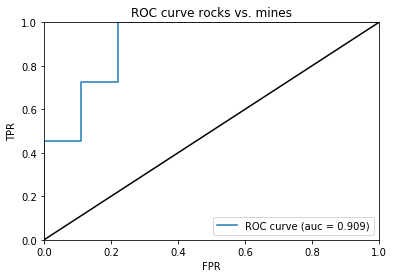

In [17]:
plot.clf()
plot.plot(fpr, tpr, label = "ROC curve (auc = %0.3f)" % roc_auc)
plot.plot([0, 1], [0, 1], 'k-')
plot.xlim([0.0, 1.0])
plot.ylim([0.0, 1.0])
plot.xlabel("FPR")
plot.ylabel("TPR")
plot.title("ROC curve rocks vs. mines")
plot.legend(loc = "lower right")
plot.show()

### Forward stepwise regression

In [18]:
from math import sqrt

In [19]:
attributeList = []
index = range(len(rockMine.columns) - 1)
indexSet = set(index)
indexSeq = []
oosError = []

In [20]:
def xattrSelect(x, idxSet):
    """takes x matrix as a list of lists and returns subset containing columns in idxSet"""
    xOut = []
    for row in x:
        xOut.append([row[i] for i in idxSet])
    return(xOut)

In [21]:
#xattrSelect(xTrain, {1, 2, 3, 5})

In [22]:
for i in index:
    attSet = set(attributeList)
    attTrySet = indexSet - attSet
    attTry = [ii for ii in attTrySet]
    errorList = []
    attTemp = []
    
    for iTry in attTry:
        attTemp = [] + attributeList
        attTemp.append(iTry)
        xTrainTemp = xattrSelect(xTrain, attTemp)
        xTestTemp = xattrSelect(xTest, attTemp)
        rockMineStepwiseModel = linear_model.LinearRegression()
        rockMineStepwiseModel.fit(xTrainTemp, yTrain)
        rmsError = np.linalg.norm((yTest - rockMineStepwiseModel.predict(xTestTemp)), 2) / sqrt(len(yTest))
        errorList.append(rmsError)
        attTemp = []
    
    iBest = np.argmin(errorList)
    attributeList.append(attTry[iBest])
    oosError.append(errorList[iBest])

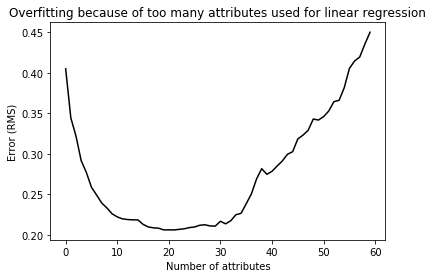

In [23]:
x = range(len(oosError))
plot.plot(x, oosError, 'k')
plot.xlabel("Number of attributes")
plot.ylabel("Error (RMS)")
plot.title("Overfitting because of too many attributes used for linear regression")
plot.show()

In [24]:
indexBest = oosError.index(min(oosError))
attributesBest = attributeList[1:(indexBest + 1)]

xTrain = xattrSelect(xTrain, attributesBest)
xTest = xattrSelect(xTest, attributesBest)

rockMineBestModel = linear_model.LinearRegression()
rockMineBestModel.fit(xTrain, yTrain)

testPredictions = rockMineBestModel.predict(xTest)


In [37]:
print("Best attributes names: ", [list(summary.columns)[i] for i  in attributesBest])

Best attributes names:  ['V50', 'V26', 'V4', 'V19', 'V16', 'V57', 'V11', 'V27', 'V41', 'V18', 'V53', 'V8', 'V52', 'V7', 'V51', 'V12', 'V58', 'V59', 'V3', 'V14', 'V13']


In [25]:
conMat = confusion_Matrix(testPredictions, yTest, 0.5)
print("Accuracy: ", str(conMat.get_acc()))

Accuracy:  1.0


In [26]:
fpr, tpr, thresholds = roc_curve(yTest.astype(int), testPredictions)
roc_auc = auc(fpr, tpr)
print("AUC for test ROC curve: ", roc_auc)

AUC for test ROC curve:  1.0


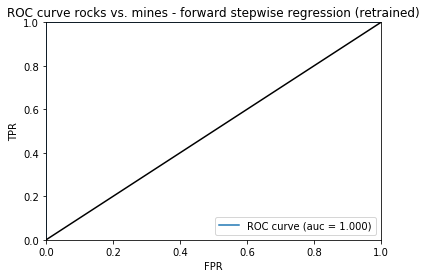

In [36]:
plot.clf()
plot.plot(fpr, tpr, label = "ROC curve (auc = %0.3f)" % roc_auc)
plot.plot([0, 1], [0, 1], 'k-')
plot.xlim([0.0, 1.0])
plot.ylim([0.0, 1.0])
plot.xlabel("FPR")
plot.ylabel("TPR")
plot.title("ROC curve rocks vs. mines - forward stepwise regression (retrained)")
plot.legend(loc = "lower right")
plot.show()

In [28]:
conMat.get_fp()

0.0

In [29]:
conMat.get_fn()

0.0

In [30]:
conMat.get_tn()

9.0

In [31]:
conMat.get_tp()

11.0

Best attributes names:  ['V50', 'V26', 'V4', 'V19', 'V16', 'V57', 'V11', 'V27', 'V41', 'V18', 'V53', 'V8', 'V52', 'V7', 'V51', 'V12', 'V58', 'V59', 'V3', 'V14', 'V13']


[50,
 26,
 4,
 19,
 16,
 57,
 11,
 27,
 41,
 18,
 53,
 8,
 52,
 7,
 51,
 12,
 58,
 59,
 3,
 14,
 13]